In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
rmse = lambda y, yh: mean_squared_error(y, yh) ** 0.5

In [3]:
train = pd.read_csv('train.csv')

In [4]:
x, y = train.drop(['Pawpularity', 'Id'], axis=1), train['Pawpularity']

In [55]:
searcher = RandomizedSearchCV(
    Ridge(),
    param_distributions={
        'alpha' : np.logspace(-3, 2, 5),
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.055376,0.040969,0.002275,0.000084,100.0,{'alpha': 100.0},-20.706991,-20.832444,-20.892585,-20.116125,-20.410057,-20.591640,0.290154,1
3,0.036969,0.038921,0.002110,0.000270,5.623413,{'alpha': 5.623413251903491},-20.711873,-20.841458,-20.882045,-20.124791,-20.424493,-20.596932,0.285288,2
2,0.037637,0.040377,0.004185,0.004209,0.316228,{'alpha': 0.31622776601683794},-20.712395,-20.842336,-20.881217,-20.125766,-20.425929,-20.597529,0.284819,3


<BarContainer object of 12 artists>

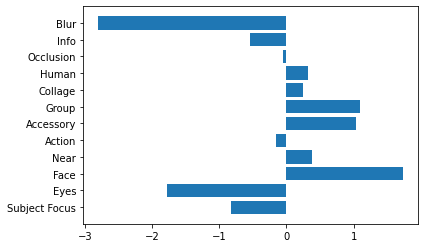

In [56]:
plt.barh(x.columns, searcher.best_estimator_.coef_)

In [58]:
searcher = RandomizedSearchCV(
    DecisionTreeRegressor(),
    param_distributions={
        'max_depth' : [2, 3, 4, 5, 7],
        'min_samples_leaf' : [1, 5, 10, 20],
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.003039,0.000011,0.001082,0.000007,20,4,"{'min_samples_leaf': 20, 'max_depth': 4}",-20.724102,-20.845043,-20.881135,-20.116175,-20.385732,-20.590437,0.294627,1
9,0.002781,0.000020,0.001076,0.000007,20,3,"{'min_samples_leaf': 20, 'max_depth': 3}",-20.713134,-20.830522,-20.922633,-20.123433,-20.364528,-20.590850,0.300725,2
0,0.003312,0.000403,0.001392,0.000059,20,2,"{'min_samples_leaf': 20, 'max_depth': 2}",-20.719079,-20.820220,-20.904759,-20.122009,-20.396656,-20.592545,0.291582,3


<BarContainer object of 12 artists>

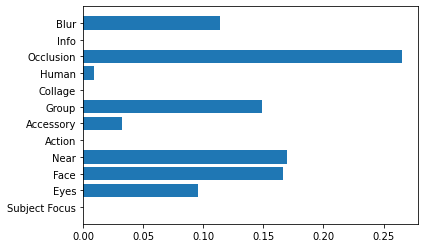

In [59]:
plt.barh(x.columns, searcher.best_estimator_.feature_importances_)

In [63]:
import shap

In [1]:
# explainer = shap.Explainer(model)

## Embedding model

In [7]:
from utils import load_pickle
import numpy as np

In [4]:
embs, ids = load_pickle('artifacts/embs/efficientnet_v2_m__embs.pkl')
ids = np.array(ids)

In [21]:
x = embs
y = train.set_index('Id').loc[ids]['Pawpularity'].to_numpy()

In [22]:
searcher = RandomizedSearchCV(
    Ridge(),
    param_distributions={
        'alpha' : np.logspace(-3, 2, 5),
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.498241,0.054546,0.020635,0.029615,100.0,{'alpha': 100.0},-19.565354,-19.212116,-19.381084,-19.634901,-19.192691,-19.397229,0.179509,1
3,0.483854,0.090662,0.072396,0.030676,5.623413,{'alpha': 5.623413251903491},-20.260892,-19.843242,-20.040607,-20.262112,-19.737864,-20.028943,0.213315,2
2,0.426377,0.065902,0.070769,0.030507,0.316228,{'alpha': 0.31622776601683794},-20.329747,-19.909536,-20.108016,-20.323408,-19.792759,-20.092693,0.215947,3


In [23]:
searcher = RandomizedSearchCV(
    DecisionTreeRegressor(),
    param_distributions={
        'max_depth' : [3, 5, 7, 9],
        'min_samples_leaf' : [5],
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.002368,0.010808,0.002658,0.000025,5,3,"{'min_samples_leaf': 5, 'max_depth': 3}",-19.742288,-20.263004,-19.985568,-20.196229,-20.015338,-20.040485,0.182395,1
1,3.083335,0.030108,0.002975,0.000399,5,5,"{'min_samples_leaf': 5, 'max_depth': 5}",-20.113000,-20.383295,-20.225062,-20.668222,-20.400390,-20.357994,0.187815,2
2,4.059315,0.022559,0.003517,0.001326,5,7,"{'min_samples_leaf': 5, 'max_depth': 7}",-20.536974,-20.751426,-20.843196,-21.122521,-21.136045,-20.878033,0.227995,3


# Torch Embedding model. Loss tuning

In [200]:
from utils import load_pickle
from sklearn.model_selection import KFold
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils import data

from tqdm.notebook import tqdm

In [6]:
embs, ids = load_pickle('artifacts/embs/efficientnet_v2_m__embs.pkl')
ids = np.array(ids)

In [39]:
x = embs
y = train.set_index('Id').loc[ids]['Pawpularity'].to_numpy()
y = y / 100

In [245]:
x = x.astype(np.float32)
y = y.astype(np.float32)

In [208]:
rmse = lambda yh, y: mean_squared_error(y, yh) ** 0.5

In [246]:
class PawpularityEmbeddingsDataset(data.Dataset):
    def __init__(self, x, y):
        super().__init__()
        
        self.x = x
        self.y = y[:, np.newaxis]
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [288]:
class PawpularityHead(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.fc = nn.Linear(in_dim, 1)
        self.fc_act = nn.Sigmoid() # for test simplicity
        
    def forward(self, x):
        x = self.fc(x)
        x = self.fc_act(x)
        
        return x

In [248]:
def test(module, test_dl, metrics:dict):
    module = module.train(False)
    
    yh = []
    yt = []
    with torch.no_grad():
        for x, y in test_dl:
            yhc = module(x).detach().cpu().numpy()
            yh.append(yhc)
            yt.append(y)
            
    yh = np.concatenate(yh, axis=0)
    y = np.concatenate(yt, axis=0)
    
    res = {}
    for mname, mfunc in metrics.items():
        res[mname] = mfunc(yh, y)
    
    return res

In [263]:
def train(
    module: nn.Module, 
    loss_f, 
    optimizer: torch.optim.Optimizer, 
    train_dl: data.DataLoader, 
    test_dl: data.DataLoader, 
    epochs: int,
    pbar_update_steps: int=100,
    ):
    
    logs = []
    test_logs = []
    for epoch in range(epochs):
        module = module.train(True)
        with tqdm(total=len(train_dl)) as pbar:
            pbar.set_description(f'epoch {epoch}')
            
            for step, (x, y) in enumerate(train_dl):
                yh = module(x)
                loss = loss_f(yh, y)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                loss = loss.detach().cpu().numpy()
                
                log = {'loss' : float(loss)}
                logs.append(log)
                
                if step % pbar_update_steps == 0:
                    running_loss = np.mean([log['loss'] for log in logs[-pbar_update_steps:]])
                    pbar.set_postfix({'loss' : running_loss})
                pbar.update()
        
        test_metrics = test(module, test_dl, {'rmse' : rmse})
        test_logs.append(test_metrics)
        print(test_metrics)
    
    return logs, test_logs

In [250]:
IMG_EMB_DIM = x.shape[1]

In [264]:
pph = PawpularityHead(IMG_EMB_DIM)
ppds = PawpularityEmbeddingsDataset(x, y)
dl = data.DataLoader(ppds, 64)

model = pph

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
logs, test_logs = train(model, loss_fn, optimizer, dl, dl, epochs=20)

  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.1842634789163894}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.18023653737636608}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.1779118060978705}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17647610128664062}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.1755422663030638}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17490988501601365}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17446726727594394}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17414869259834473}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17391376850125087}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17373686441503822}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17360120062886697}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.173495504843569}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17341200709930435}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17334523259772416}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.1732912828363297}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17324728845356963}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17321111170275763}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.17318114954732708}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.1731561842954243}


  0%|          | 0/155 [00:00<?, ?it/s]

{'rmse': 0.1731352659996385}


## Soft BCE loss

In [289]:
kf = KFold()
logs_per_model = []
for train_inds, test_inds in  kf.split(x, y):
    x_train = x[train_inds]
    x_test = x[test_inds]
    
    y_train = y[train_inds]
    y_test = y[test_inds]
    
    pph = PawpularityHead(IMG_EMB_DIM)
    ppds_train = PawpularityEmbeddingsDataset(x_train, y_train)
    ppds_test = PawpularityEmbeddingsDataset(x_test, y_test)
    dl_train = data.DataLoader(ppds_train, 64)
    dl_test = data.DataLoader(ppds_test, 64)

    model = pph

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    logs = train(model, loss_fn, optimizer, dl_train, dl_test, epochs=20)
    logs_per_model.append(logs)

  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1912173195106051}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19100761747835907}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19141690555418378}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19216140360550765}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.193054546557297}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1939900353412831}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19491148789122925}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.195790326226993}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19661325281631936}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19737536144706674}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19807637613789356}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19871849005211692}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1993051416409042}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19984031464022717}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20032815015123384}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20077269495093417}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20117780991475412}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20154708759022502}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2018838339310658}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20219109495171464}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18840312021009323}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.187465624837108}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1875163210282251}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18802922781347756}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1887530833270377}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1895568209928474}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19037212577799173}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19116363914530482}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19191387554635558}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19261511704665246}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1932650731100671}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1938644805448661}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19441557934402898}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1949214071447839}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19538528993347595}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19581058886691513}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1962005263734653}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19655819372666597}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19688638737458422}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19718772936534087}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18907202901550055}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18831545610066894}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18860612872884258}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18925297379582393}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19002230179239527}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19081871203841702}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19159964114284458}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19234555266067804}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1930478215860141}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19370338394444364}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19431214690153348}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19487552397512545}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.195395747563364}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19587543424754156}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19631727215195874}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1967240064856451}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19709825497231698}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19744252308635213}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1977591619852803}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19805034506502164}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19004752129511737}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19038794622466024}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19125246175727437}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.192261933822572}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19330168354694544}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19431674805025528}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19527984346129548}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19617856649686405}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19700874939782836}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19777068078751045}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1984671645631985}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19910218063417204}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19968027061485616}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2002060584929122}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2006841042319532}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20111870294460896}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20151385156407628}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20187326028977715}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20220029783059532}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20249800012919636}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19068656615082047}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19095559493323871}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1915034319897527}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19211135146530997}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19271374815129444}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19328803856167823}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1938262178111163}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19432607462789647}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1947879805360605}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19521350259019626}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19560471609335506}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1959639081391787}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19629343701702434}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19659558366506427}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19687251778203402}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19712628268233973}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19735878925600486}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19757185668474597}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19776710183658439}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19794604539327149}


In [290]:
np.mean([e[1][-1]['rmse'] for e in logs_per_model])

0.19957464298090902

## MSE loss and sigmoid head

In [280]:
kf = KFold()
logs_per_model = []
for train_inds, test_inds in  kf.split(x, y):
    x_train = x[train_inds]
    x_test = x[test_inds]
    
    y_train = y[train_inds]
    y_test = y[test_inds]
    
    pph = PawpularityHead(IMG_EMB_DIM)
    ppds_train = PawpularityEmbeddingsDataset(x_train, y_train)
    ppds_test = PawpularityEmbeddingsDataset(x_test, y_test)
    dl_train = data.DataLoader(ppds_train, 64)
    dl_test = data.DataLoader(ppds_test, 64)

    model = pph

    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    logs = train(model, loss_fn, optimizer, dl_train, dl_test, epochs=20)
    logs_per_model.append(logs)

  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18952585574317807}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18973313118973736}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19050474399444323}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19149216845001316}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19255046026756314}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19360664240078804}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19462445182698596}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19558674631776266}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1964865208502929}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19732224246789945}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19809532362948826}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19880866871727548}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19946595356526037}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20007107298852198}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20062801770290745}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2011405679730385}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20161236064976318}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20204679725815988}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20244697971648956}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20281580169940883}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18848532819376457}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18756820511077973}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18776044043136494}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18837318154629945}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18915650655192434}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18999753970824526}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19084066401551206}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19165772830984518}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19243489446359743}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1931661160227794}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19384960682846059}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1944859658813137}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19507707712413738}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19562541690452928}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1961337276757243}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19660479266482134}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1970413651770258}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1974460324511377}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19782124067644452}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1981692532326314}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18965762201574424}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1888475768866053}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1890175226007028}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.18958216136702877}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19031123854621534}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19109999230857405}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1918963852033285}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1926736617902219}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19341815671513918}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1941233291443535}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19478672785456297}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19540810152619742}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19598851514760549}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19652969641548343}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19703366077711895}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19750264535713716}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19793886553766385}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19834446265412808}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19872156446599143}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19907212939244864}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19107405387140572}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1910769490913844}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1918261068719106}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1928245101879214}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19390301430436274}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19498111268114587}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19601953325446259}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19699970110759232}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19791401162792677}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19876068410406764}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1995411582733064}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2002585427519418}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20091675812972193}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2015200721827963}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20207279282704446}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2025790856452994}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20304291240235095}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20346795986457433}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20385765943684697}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20421512310131776}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1914528575905623}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19141117401017507}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19169487892403764}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19214936436295624}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19268300989804843}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19324090006044536}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19379372411010423}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1943263525971335}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19483141778250906}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1953059195363624}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19574917615032636}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19616182672979043}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19654521076174983}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19690096547697467}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19723085531366963}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19753668829117427}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19782014844068127}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1980829209850461}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.19832652510716953}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.1985523822477241}


In [282]:
np.mean([e[1][-1]['rmse'] for e in logs_per_model])

0.20056493793470614

## MSE loss not activation head

In [284]:
class PawpularityHead(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.fc = nn.Linear(in_dim, 1)
        
    def forward(self, x):
        x = self.fc(x)
        
        return x

In [285]:
kf = KFold()
logs_per_model = []
for train_inds, test_inds in  kf.split(x, y):
    x_train = x[train_inds]
    x_test = x[test_inds]
    
    y_train = y[train_inds]
    y_test = y[test_inds]
    
    pph = PawpularityHead(IMG_EMB_DIM)
    ppds_train = PawpularityEmbeddingsDataset(x_train, y_train)
    ppds_test = PawpularityEmbeddingsDataset(x_test, y_test)
    dl_train = data.DataLoader(ppds_train, 64)
    dl_test = data.DataLoader(ppds_test, 64)

    model = pph

    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    logs = train(model, loss_fn, optimizer, dl_train, dl_test, epochs=20)
    logs_per_model.append(logs)

  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2364469970108697}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.22513636258334496}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.22099348396247065}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21911862512815236}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21790303022291796}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2168607961224815}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21588560989395778}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21497860924079532}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21415964797099235}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21344260306003687}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21283130519253354}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21232142167525056}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2119034355768756}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21156524040836433}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21129398775346012}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21107738766056805}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21090426889671268}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21076503520212533}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21065176932358992}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21055804667090292}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2317648826149517}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.22055696188020987}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21618599786592224}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21391861876345142}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21241674264794486}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21125610449960225}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2102940157466294}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2094794141128371}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2087902165408665}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20821217451056973}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20773231816645416}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20733771044423266}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20701567573267457}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20675446343822082}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2065435459137917}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2063738353639778}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2062377116848621}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2061288980210279}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20604222156005084}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2059734509770397}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.22910061158798353}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21387229982998116}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20903551955388705}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2073818872272704}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20668041444692775}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20624921755208803}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2058869985762051}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20554344429566157}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2052147546399305}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20490892787496587}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.204634249654659}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20439592152289918}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20419584040718217}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20403309636530206}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2039049470063302}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2038076465623064}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20373692406195498}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20368848184967542}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20365829336157742}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20364268065513885}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.23418379772864795}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.22371705313480106}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21970803076691114}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2178218856086486}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21662608283917448}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21565720276234485}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21478643519829102}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21399011954500174}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21327117714483565}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21263475528082768}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21208211502338567}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21161032148897516}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2112134082692709}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21088358401966212}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21061242627779844}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21039150358258144}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2102128934570394}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.21006946863659456}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20995494035539422}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2098639508179447}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2311943399614277}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2173751901693757}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2126034190457432}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2105058739821198}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20927201734663298}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20832998551221948}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20750857155974378}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20676967903186552}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2061134543843348}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20554560105245448}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20506787047406685}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20467677124676295}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20436488965017668}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20412247838076403}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20393904462446244}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20380418276434586}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.2037083520478336}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20364315627957247}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20360144345201828}


  0%|          | 0/124 [00:00<?, ?it/s]

{'rmse': 0.20357738150948998}


In [286]:
np.mean([e[1][-1]['rmse'] for e in logs_per_model])

0.2067231021261032

# Conclusion

- it is better to use soft BCE loss (the best test metric)
- we need add some regularization (results of torch's model worse than sklearn's linear model but main difference in regularization)
- BEST baseline score 19.4 (best torch baseline 19.96)